# Case Study on Probability for Data Science
Problem Statement: 

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset to the python environment
mushroom=pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Here the given problem is a classification problem since we have to predict if the mushroom is edible or poisonous

## Data Analysis

In [3]:
mushroom.shape

(8124, 23)

The dataset contains 8124 rows and 23 columns

In [4]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values are present in the dataset

In [6]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The datatype of all the features are object datatype

Hence we have to label encode all the features

In [7]:
# Checking the number of unique values in each Column

mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Data Preprocessing

In [8]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in mushroom.columns:
    mushroom[col] = le.fit_transform(mushroom[col])
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [9]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=mushroom.drop(['class'],axis=1)
y=pd.DataFrame(mushroom['class'])

In [10]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

## Building the models

In [11]:
# Model 1 : Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [12]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[989  51]
 [ 51 940]]
F1_score : 0.949
Accuracy : 0.95


In [13]:
# Model 2 : KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.9980305268340719,
 0.9970457902511078,
 0.9960610536681438,
 0.9965534219596258,
 0.9955686853766618,
 0.9950763170851797,
 0.9960610536681438,
 0.9945839487936977,
 0.9935992122107337,
 0.9931068439192516,
 0.9926144756277696,
 0.9940915805022157]

In [14]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[1037    3]
 [   9  982]]
F1_score : 0.994
Accuracy : 0.994


Text(0, 0.5, 'Accuracy')

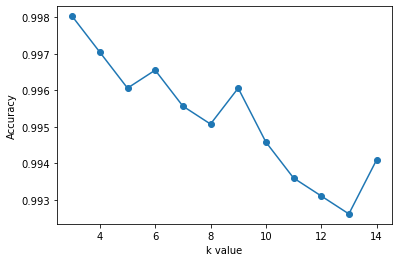

In [15]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [16]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [17]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[1037    3]
 [   1  990]]
F1_score : 0.998
Accuracy : 0.998


In [18]:
# Model 3 : Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [19]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[1040    0]
 [   0  991]]
F1_score : 1.0
Accuracy : 1.0


In [20]:
# Model 4 : Linear SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [21]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[994  46]
 [ 36 955]]
F1_score : 0.959
Accuracy : 0.96


In [22]:
# Model 5 : Polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [23]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[1040    0]
 [   0  991]]
F1_score : 1.0
Accuracy : 1.0


In [24]:
# Model 6 : Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [25]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[1038    2]
 [  15  976]]
F1_score : 0.991
Accuracy : 0.992


In [26]:
# Model 7 : Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [27]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[1040    0]
 [   0  991]]
F1_score : 1.0
Accuracy : 1.0


In [28]:
# Model 8 : Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [29]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3))

Confusion matrix : 
 [[1040    0]
 [   0  991]]
F1_score : 1.0
Accuracy : 1.0


In [30]:
# Model 9 : Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [31]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[958  82]
 [ 67 924]]
Accuracy : 0.927


In [32]:
# Model 9 : Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [33]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[984  56]
 [260 731]]
Accuracy : 0.844


# Summary of the models created

We can conclude that :
    
    ** All the models are performing relatively well.
    
    ** Even though below mentioned four models are the best fit to classify the mushrooms as edible or poisonus.They are:
        
        * Decisin Tree
        * Polynomial SVM
        * Random Forest
        * Gradient Boosting